In [1]:
# ML Training for Complication Prediction

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('complication_prediction_data.csv')

In [3]:
# 1. Preprocessing
# -------------------------------
# Encode categorical variables
label_cols = ['surgery_type', 'wound_status', 'mobility_level', 'complication_flag']
label_encoders = {}

In [4]:
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [5]:
# Scale numeric columns
scaler = StandardScaler()
numeric_cols = ['age', 'pain_score', 'fever', 'day_of_recovery']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [6]:
# Split into features and target
X = df.drop(columns=['patient_id', 'complication_flag'])
y = df['complication_flag']

In [7]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 2. Train Models

In [9]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:12:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    roc_score = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} AUC = {roc_score:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend()
    plt.show()

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       805
           1       0.00      0.00      0.00       195

    accuracy                           0.81      1000
   macro avg       0.40      0.50      0.45      1000
weighted avg       0.65      0.81      0.72      1000



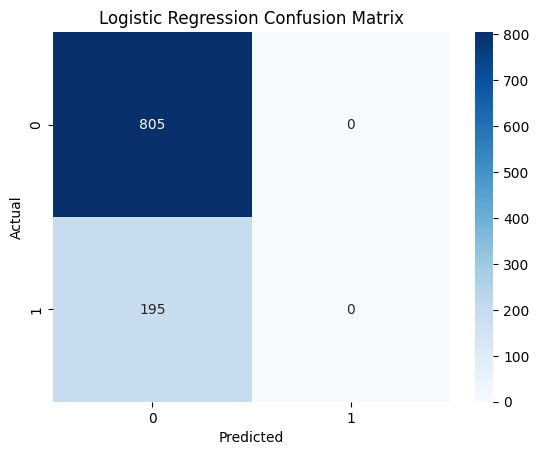

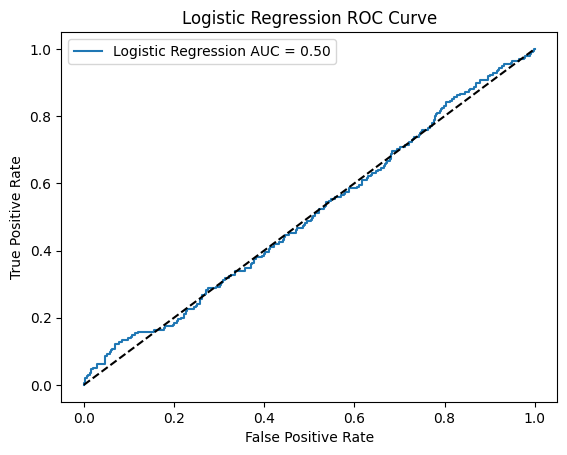


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       805
           1       0.27      0.02      0.03       195

    accuracy                           0.80      1000
   macro avg       0.54      0.50      0.46      1000
weighted avg       0.70      0.80      0.72      1000



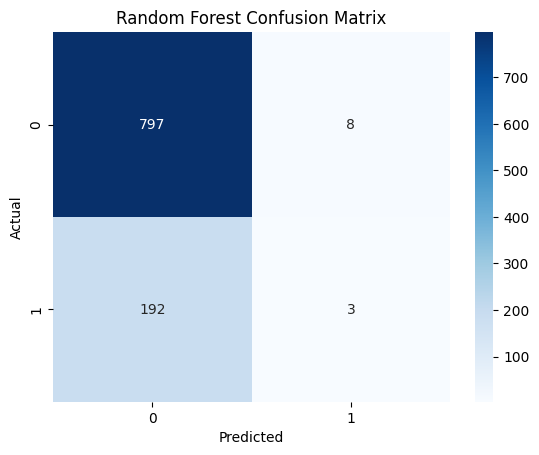

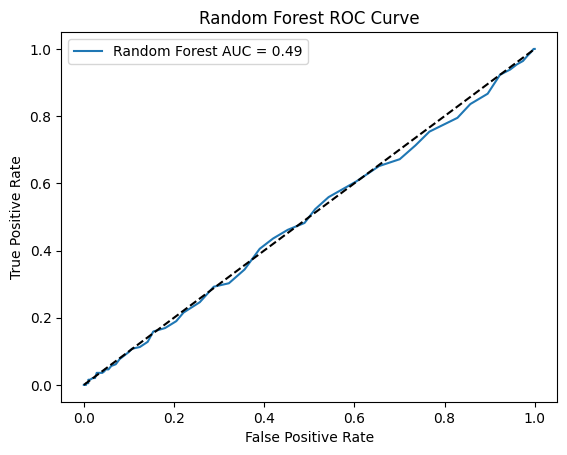


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       805
           1       0.22      0.07      0.11       195

    accuracy                           0.77      1000
   macro avg       0.51      0.50      0.49      1000
weighted avg       0.69      0.77      0.72      1000



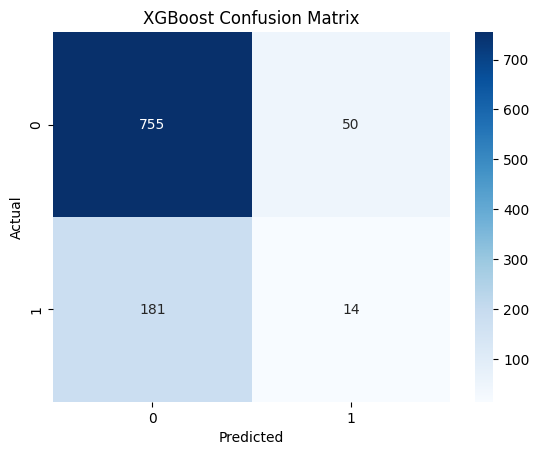

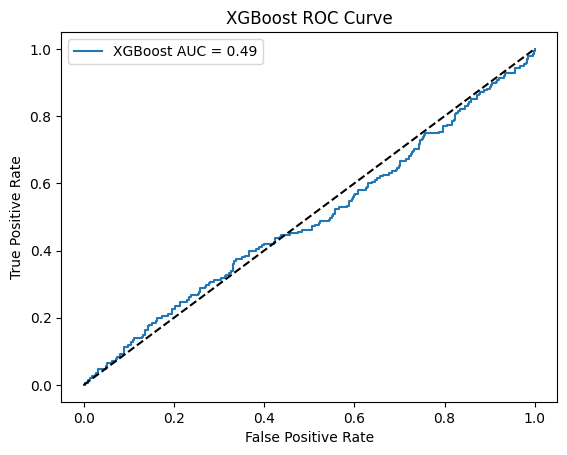

In [13]:
evaluate_model(log_model, "Logistic Regression")
evaluate_model(rf_model, "Random Forest")
evaluate_model(xgb_model, "XGBoost")


In [14]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, log_model.predict(X_test)))


[[805   0]
 [195   0]]


In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])


0.4932951106864151

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}

# Instantiate a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',       # or 'roc_auc'
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,
    verbose=2
)

# Run the search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Use best model
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score: 0.1287848104942732


In [17]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

best_rf = random_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'class_weight': 'balanced'}
Best F1 Score: 0.14770914400108784



Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       805
           1       0.17      0.10      0.12       195

    accuracy                           0.73      1000
   macro avg       0.49      0.49      0.48      1000
weighted avg       0.68      0.73      0.70      1000



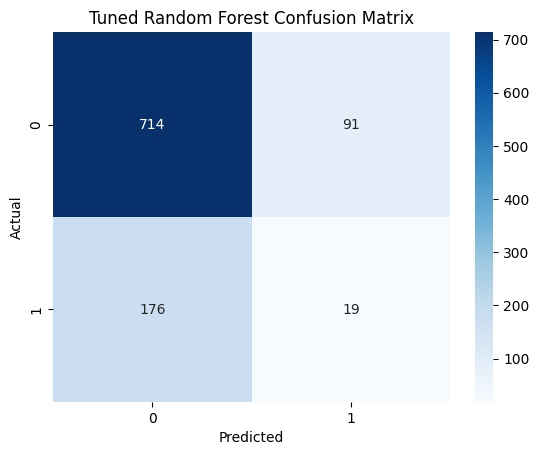

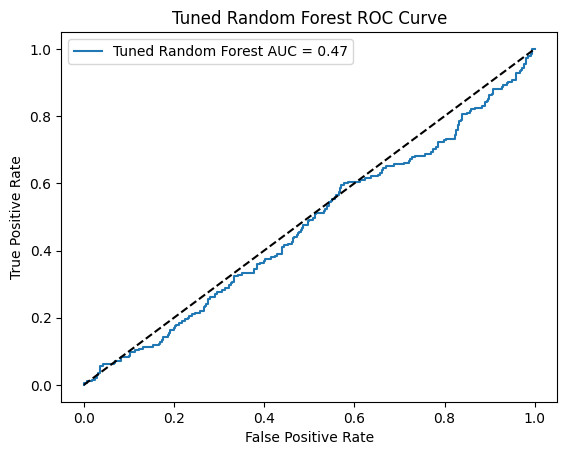

In [18]:
evaluate_model(best_rf, "Tuned Random Forest")
